In [5]:
import numpy as np
import matplotlib.pyplot as plt

class RedNeuronal:
    def __init__(self, capas):
        """
        Crea una red neuronal con arquitectura flexible.
        
        Args:
            capas: lista con la cantidad de neuronas en cada capa
                   Ejemplo: [2, 5, 3, 1] = 2 entradas, 2 capas ocultas (5 y 3 neuronas), 1 salida
        """
        self.capas = capas
        self.num_capas = len(capas)
        
        # Inicializar pesos y sesgos aleatoriamente
        self.pesos  = []
        self.sesgos = []
        
        for i in range(self.num_capas - 1):
            # Pesos entre capa i y capa i+1
            w = np.random.randn(capas[i], capas[i+1]) * 0.5
            b = np.zeros(capas[i+1])
            self.pesos.append(w)
            self.sesgos.append(b)
    
    def sigmoid(self, x):
        """Función de activación sigmoide"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivada(self, x):
        """Derivada de la función sigmoide"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def predecir(self, X):
        """Predice la salida para una entrada X"""
        activacion = X
        for w, b in zip(self.pesos, self.sesgos):
            z = np.dot(activacion, w) + b
            activacion = self.sigmoid(z)
        return activacion
    
    def aprender(self, X, y, ajuste=0.1, epochs=1000):
        """
        Entrena la red usando retropropagación.
        
        Args:
            X: matriz de entradas (n_muestras, n_entradas)
            y: matriz de salidas (n_muestras, n_salidas)
            ajuste: tasa de aprendizaje
            epochs: número de épocas
        """
        n = len(X)
        
        for epoch in range(epochs):
            error_total = 0
            
            for xi, yi in zip(X, y):
                # Forward pass - guardar todas las activaciones
                activaciones = [xi]
                zs = []
                
                for w, b in zip(self.pesos, self.sesgos):
                    z = np.dot(activaciones[-1], w) + b
                    zs.append(z)
                    activacion = self.sigmoid(z)
                    activaciones.append(activacion)
                
                # Calcular error
                y_pred = activaciones[-1]
                error = yi - y_pred
                error_total += np.sum(error ** 2)
                
                # Backward pass (retropropagación)
                deltas = [error * self.sigmoid_derivada(zs[-1])]
                
                # Calcular deltas para capas ocultas (de atrás hacia adelante)
                for i in range(len(self.pesos) - 2, -1, -1):
                    delta = np.dot(deltas[0], self.pesos[i+1].T) * self.sigmoid_derivada(zs[i])
                    deltas.insert(0, delta)
                
                # Actualizar pesos y sesgos
                for i in range(len(self.pesos)):
                    self.pesos[i] += ajuste * np.outer(activaciones[i], deltas[i])
                    self.sesgos[i] += ajuste * deltas[i]
            
            # Mostrar progreso
            if epoch % 200 == 0:
                mse = error_total / n
                print(f"Época {epoch}: Error = {mse:.6f}")
        
        print(f"\n✓ Entrenamiento completado!")
    
    def resumen(self):
        """Muestra un resumen de la arquitectura de la red"""
        print("=" * 50)
        print("ARQUITECTURA DE LA RED NEURONAL")
        print("=" * 50)
        for i, (entrada, salida) in enumerate(zip(self.capas[:-1], self.capas[1:])):
            capa_tipo = "Salida" if i == len(self.capas) - 2 else f"Oculta {i+1}"
            print(f"Capa {i+1} ({capa_tipo}): {entrada} → {salida} neuronas")
            print(f"  Pesos: {self.pesos[i].shape}")
        print("=" * 50)



In [6]:

# ============================================================================
# EJEMPLO 1: Función XOR (2 entradas, 1 salida)
# ============================================================================
print("\n📊 EJEMPLO 1: Problema XOR\n")

# Datos XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Crear red: 2 entradas → 4 neuronas ocultas → 1 salida
red_xor = RedNeuronal([2, 4, 1])
red_xor.resumen()

# Entrenar
red_xor.aprender(X_xor, y_xor, ajuste=0.5, epochs=2000)

# Probar
print("\nResultados:")
for x, y_real in zip(X_xor, y_xor):
    y_pred = red_xor.predecir(x)
    print(f"  {x} → Predicho: {y_pred[0]:.4f}, Real: {y_real[0]}")




📊 EJEMPLO 1: Problema XOR

ARQUITECTURA DE LA RED NEURONAL
Capa 1 (Oculta 1): 2 → 4 neuronas
  Pesos: (2, 4)
Capa 2 (Salida): 4 → 1 neuronas
  Pesos: (4, 1)
Época 0: Error = 0.274628
Época 200: Error = 0.263101
Época 400: Error = 0.258836
Época 600: Error = 0.238189
Época 800: Error = 0.189522
Época 1000: Error = 0.115153
Época 1200: Error = 0.031164
Época 1400: Error = 0.012847
Época 1600: Error = 0.007474
Época 1800: Error = 0.005120

✓ Entrenamiento completado!

Resultados:
  [0 0] → Predicho: 0.0500, Real: 0
  [0 1] → Predicho: 0.9394, Real: 1
  [1 0] → Predicho: 0.9430, Real: 1
  [1 1] → Predicho: 0.0765, Real: 0


In [7]:

# ============================================================================
# EJEMPLO 2: Clasificación con 3 salidas
# ============================================================================
print("\n\n📊 EJEMPLO 2: Clasificación multi-clase\n")

# Datos de ejemplo (3 clases)
np.random.seed(42)
X_multi = np.array([
    [0.1, 0.2], [0.2, 0.1], [0.15, 0.15],  # Clase 0
    [0.8, 0.9], [0.9, 0.8], [0.85, 0.85],  # Clase 1
    [0.1, 0.9], [0.2, 0.8], [0.15, 0.85],  # Clase 2
])
y_multi = np.array([
    [1, 0, 0], [1, 0, 0], [1, 0, 0],
    [0, 1, 0], [0, 1, 0], [0, 1, 0],
    [0, 0, 1], [0, 0, 1], [0, 0, 1],
])

# Crear red: 2 entradas → 5 ocultas → 3 salidas
red_multi = RedNeuronal([2, 10, 5, 3])
red_multi.resumen()

# Entrenar
red_multi.aprender(X_multi, y_multi, ajuste=0.3, epochs=2000)

# Probar
print("\nResultados:")
for x, y_real in zip(X_multi, y_multi):
    y_pred = red_multi.predecir(x)
    clase_pred = np.argmax(y_pred)
    clase_real = np.argmax(y_real)
    print(f"  {x} → Clase predicha: {clase_pred}, Clase real: {clase_real}")





📊 EJEMPLO 2: Clasificación multi-clase

ARQUITECTURA DE LA RED NEURONAL
Capa 1 (Oculta 1): 2 → 10 neuronas
  Pesos: (2, 10)
Capa 2 (Oculta 2): 10 → 5 neuronas
  Pesos: (10, 5)
Capa 3 (Salida): 5 → 3 neuronas
  Pesos: (5, 3)
Época 0: Error = 0.791022
Época 200: Error = 0.076001
Época 400: Error = 0.006831
Época 600: Error = 0.003153
Época 800: Error = 0.002002
Época 1000: Error = 0.001453
Época 1200: Error = 0.001136
Época 1400: Error = 0.000930
Época 1600: Error = 0.000786
Época 1800: Error = 0.000680

✓ Entrenamiento completado!

Resultados:
  [0.1 0.2] → Clase predicha: 0, Clase real: 0
  [0.2 0.1] → Clase predicha: 0, Clase real: 0
  [0.15 0.15] → Clase predicha: 0, Clase real: 0
  [0.8 0.9] → Clase predicha: 1, Clase real: 1
  [0.9 0.8] → Clase predicha: 1, Clase real: 1
  [0.85 0.85] → Clase predicha: 1, Clase real: 1
  [0.1 0.9] → Clase predicha: 2, Clase real: 2
  [0.2 0.8] → Clase predicha: 2, Clase real: 2
  [0.15 0.85] → Clase predicha: 2, Clase real: 2




📊 EJEMPLO 3: Ajuste de curva con red profunda

ARQUITECTURA DE LA RED NEURONAL
Capa 1 (Oculta 1): 1 → 10 neuronas
  Pesos: (1, 10)
Capa 2 (Oculta 2): 10 → 10 neuronas
  Pesos: (10, 10)
Capa 3 (Oculta 3): 10 → 10 neuronas
  Pesos: (10, 10)
Capa 4 (Oculta 4): 10 → 10 neuronas
  Pesos: (10, 10)
Capa 5 (Oculta 5): 10 → 10 neuronas
  Pesos: (10, 10)
Capa 6 (Salida): 10 → 1 neuronas
  Pesos: (10, 1)
Época 0: Error = 0.568544
Época 200: Error = 0.498659
Época 400: Error = 0.498586
Época 600: Error = 0.498560
Época 800: Error = 0.498547
Época 1000: Error = 0.498538
Época 1200: Error = 0.498533
Época 1400: Error = 0.498528
Época 1600: Error = 0.498525
Época 1800: Error = 0.498522
Época 2000: Error = 0.498519
Época 2200: Error = 0.498517
Época 2400: Error = 0.498515
Época 2600: Error = 0.498513
Época 2800: Error = 0.498511

✓ Entrenamiento completado!


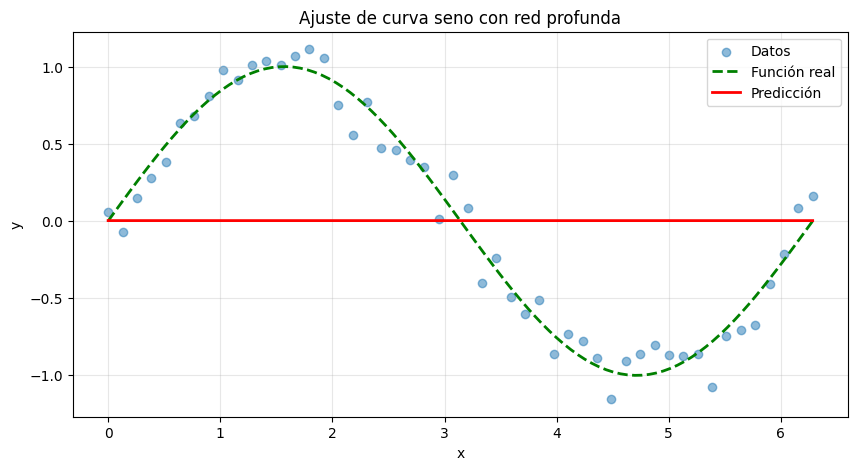

In [4]:

# ============================================================================
# EJEMPLO 3: Red profunda para curva compleja
# ============================================================================
print("\n\n📊 EJEMPLO 3: Ajuste de curva con red profunda\n")

# Generar datos de curva seno
X_curva = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)
y_curva = np.sin(X_curva) + 0.1 * np.random.randn(50, 1)

# Crear red: 1 entrada → 10 → 8 → 5 → 1 salida (red profunda)
red_curva = RedNeuronal([1, 10,10,10,10,10, 1])
red_curva.resumen()

# Entrenar
red_curva.aprender(X_curva, y_curva, ajuste=0.1, epochs=3000)

# Graficar
X_test = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y_pred = np.array([red_curva.predecir(x) for x in X_test])

plt.figure(figsize=(10, 5))
plt.scatter(X_curva, y_curva, alpha=0.5, label='Datos')
plt.plot(X_test, np.sin(X_test), 'g--', label='Función real', linewidth=2)
plt.plot(X_test, y_pred, 'r-', label='Predicción', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Ajuste de curva seno con red profunda')
plt.show()